# Измерения SAT-солвера (DPLL)

## Тестовый стенд
- HUAWEI MateBook D15 BoDE-WXX9-PCB-B4
- CPU: 11th Gen Intel(R) Core(TM) i5-1155G7 @ 2.50GHz
- Ядра: 8
- Максимальная частота: 4500 GHz
- ОЗУ: 16GB
- ОС: Ubuntu 22.04.4 LTS

## Подготовка тестового стенда
* Закрытие приложений
* Отключение интернет-соединения
* Оключение swap
* Фиксация частоты процессора
* Переход в режим высокой производительности
* Подключение к сети питания
* Переключение в режим терминала
* Задание высшего приоритета
* Прикрепление к конкретному процессору

## Методика проведения эксперимента
* Измерение производилось на файле, содержащем 100 переменных и 160 дизъюнктов (см. tests/5.txt)
* Предварительный прогрев: 40 итераций
* Замеры: 80 итераций
* Сборка в Release

## Вычисления
* Замеры проводились с помощью Stopwatch, который выдает время в миллисекундах
* Для получения времени в секундах значения делятся на 1000

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

f = "res1.txt"
t = []
with open(f, 'r') as file:
    for line in file:
        clear = line.strip()
        if clear:
            t.append(int(clear) / 1000)

print(t)

[6.688, 6.713, 6.698, 6.699, 6.698, 6.692, 6.686, 6.708, 6.694, 6.702, 6.709, 6.692, 6.706, 6.691, 6.689, 6.691, 6.709, 6.693, 6.69, 6.692, 6.689, 6.697, 6.687, 6.692, 6.69, 6.705, 6.693, 6.688, 6.701, 6.699, 6.684, 6.701, 6.7, 6.697, 6.689, 6.697, 6.687, 6.691, 6.7, 6.688, 6.684, 6.689, 6.69, 6.696, 6.69, 6.684, 6.695, 6.699, 6.701, 6.71, 6.695, 6.693, 6.689, 6.696, 6.695, 6.692, 6.705, 6.704, 6.692, 6.702, 6.689, 6.693, 6.699, 6.693, 6.699, 6.702, 6.697, 6.7, 6.702, 6.691, 6.696, 6.703, 6.698, 6.693, 6.706, 6.701, 6.692, 6.696, 6.692, 6.699]


(array([ 4., 11., 16., 10., 11., 13.,  6.,  4.,  4.,  1.]),
 array([6.684 , 6.6869, 6.6898, 6.6927, 6.6956, 6.6985, 6.7014, 6.7043,
        6.7072, 6.7101, 6.713 ]),
 <BarContainer object of 10 artists>)

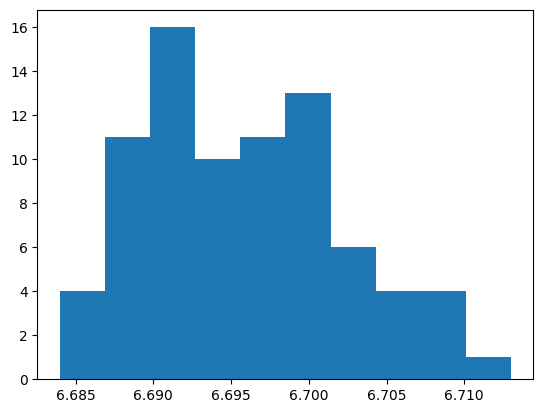

In [2]:
plt.hist(t)

### Анализ результатов измерений
* Внешне диаграмма соответствует нормальному распределению
* Тест на нормальность:

In [3]:
test_normal = stats.normaltest(t)
test_shapiro = stats.shapiro(t)

print(test_normal, test_shapiro, sep = '\n')
if test_normal[1] > 0.05 or test_shapiro[1] > 0.05:
    print("Тест пройден")

NormaltestResult(statistic=2.96514439492794, pvalue=0.2270529117020134)
ShapiroResult(statistic=0.9731216806632966, pvalue=0.08981236383616148)
Тест пройден


### Вычисления
Среднее: $\bar{t} = \frac{\sum_{i=1}^{n} t_i}{n}$

In [4]:
mean = np.mean(t)
print(mean)

6.695712499999999


Стандартное отклонение: $\sigma_{с.о.} = \sqrt{\frac{\sum_{i=1}^{n} (t_i - \bar{t})^2}{n - 1}}$

In [5]:
std = np.std(t, ddof=1)
print(std)

0.00657034717692422


Качество проведенного эксперимента оценим косвенно, посчитав отношение стандартного отклонения к среднему:

In [6]:
quality = (std / mean) * 100
print(quality)

0.09812767762839608


Стандартное отклонение среднего: $\sigma_{с.о.с} = \frac{\sigma_{с.о.}}{\sqrt{n}}$


In [7]:
avg_mean_dev = std /math.sqrt(len(t))
print(avg_mean_dev)

0.0007345871461688196


Доверительный интервал:

In [8]:
interval = stats.t.ppf(0.975, df=len(t)-1)*stats.sem(t)
print(interval)

0.001462159139524077


## Итог
Результирующее значение: 6.6957 $\pm$ 0.0015 (с)